# This notebook is for data cleaning and Exploratory Data Analysis, which will be used for user persona analysis

* Starbucks dataset: https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data
* `profile.csv` - dimensional data about each person, including their age, salary, and gender. There is one unique customer for each record
* `portfolio.csv` - information about the promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers
* `transcript.csv` - records show the different steps of promotional offers that a customer received. The different values of receiving a promotion are receiving, viewing, and completing. You also see the different transactions that a person made in the time since he became a customer. With all records, you see the day that they interacted with Starbucks and the amount that it is worth

## Settings

In [1]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt

import warnings
warnings.filterwarnings('ignore')

/Users/aigerimshopenova/opt/anaconda3/envs/dev_fest/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Reading and exploring available data

### Profile data

In [3]:
df_p = pd.read_csv("./data/starbucks/profile.csv")

In [4]:
df_p.head()

Unnamed: 0 gender  age                                id  became_member_on  \
0           0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1           1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2           2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3           3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4           4    NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804   

      income  
0        NaN  
1 112,000.00  
2        NaN  
3 100,000.00  
4        NaN

Let us drop a redundant column

In [5]:
df_p.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [7]:
df_p.duplicated().sum()

0

In [8]:
df_p.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

There are some null values in the `gender` and `income` columns

In [9]:
df_p['id'].nunique()

17000

17,000 unique users in the dataset

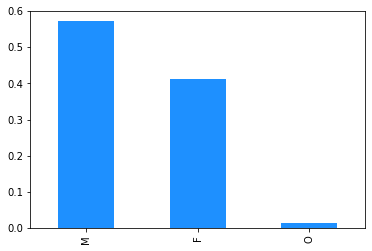

In [10]:
df_p['gender'].value_counts(normalize=True).plot.bar(color='dodgerblue');

In [11]:
df_p['gender'].value_counts(normalize=True)

M   0.57
F   0.41
O   0.01
Name: gender, dtype: float64

The majority of records belongs to Male users (57%)

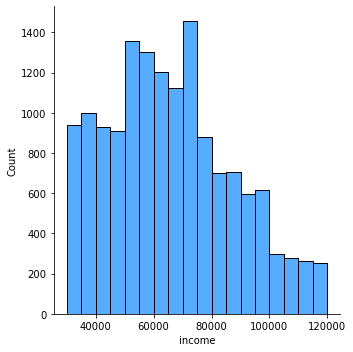

In [12]:
sns.displot(df_p, x="income", color='dodgerblue', binwidth=5000);

In [13]:
df_p['income'].describe()

count    14,825.00
mean     65,404.99
std      21,598.30
min      30,000.00
25%      49,000.00
50%      64,000.00
75%      80,000.00
max     120,000.00
Name: income, dtype: float64

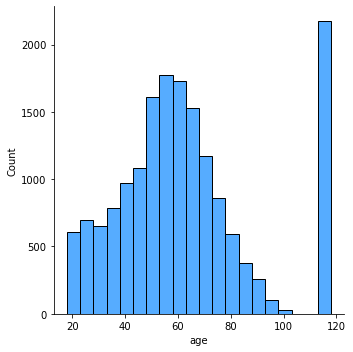

In [14]:
sns.displot(df_p, x="age", color='dodgerblue', binwidth=5);

There are some outliers in the `age` column

In [15]:
df_p['age'].describe(percentiles=[0.8, 0.9, 0.95, 0.98, 0.99])

count   17,000.00
mean        62.53
std         26.74
min         18.00
50%         58.00
80%         78.00
90%        118.00
95%        118.00
98%        118.00
99%        118.00
max        118.00
Name: age, dtype: float64

In [16]:
df_p[(df_p['age'] > 80) & (df_p['age'] <= 100)]

gender  age                                id  became_member_on  \
33         F   96  868317b9be554cb18e50bc68484749a2          20171117   
94         F   89  4264b1d027cc493281bba4f44bfedaca          20171114   
98         F   90  1c587de019994f93a242c6864fd7bc55          20151210   
126        M   83  4c29d22467af4d7faa137c4eedd65340          20180127   
131        F   89  3dae0eadb47149b0b9b548d14548524b          20180114   
...      ...  ...                               ...               ...   
16914      M   87  d1c4500ace2e45e9a45d3cd2fccac8d8          20140920   
16933      M   85  a65353ea28ff442aabfb39eb974326e3          20161001   
16938      F   89  da7bf9d84fd74a72bdee595007bcca7a          20170413   
16981      M   84  1966fa40d2f84620b2b1b9b64f8e0209          20160629   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   

         income  
33    89,000.00  
94    87,000.00  
98    98,000.00  
126   46,000.00  
131   65,000.00  
...         ...  
16914 59,000.00  
16933 96,000.00  
16938 68,000.00  
16981 93,000.00  
16998 50,000.00  

[981 rows x 5 columns]

In [17]:
df_p[df_p['age'] > 100]

gender  age                                id  became_member_on  income
0        NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2        NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4        NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6        NaN  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7        NaN  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
...      ...  ...                               ...               ...     ...
16980    NaN  118  5c686d09ca4d475a8f750f2ba07e0440          20160901     NaN
16982    NaN  118  d9ca82f550ac4ee58b6299cf1e5c824a          20160415     NaN
16989    NaN  118  ca45ee1883624304bac1e4c8a114f045          20180305     NaN
16991    NaN  118  a9a20fa8b5504360beb4e7c8712f8306          20160116     NaN
16994    NaN  118  c02b10e8752c4d8e9b73f918558531f7          20151211     NaN

[2180 rows x 5 columns]

In [18]:
df_p[df_p['age'] > 100]['income'].isnull().sum()

2175

In [19]:
df_p[df_p['age'] > 100]['gender'].isnull().sum()

2175

It seems that there are 2,175 users who didn't provide gender and income information. Also, these users identified themselves as over 100 y.o., which looks suspicious.

In [20]:
print (df_p.dtypes)

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object


`became_member_on` column has int data type

***How are we going to clean up the data?***

1. Deal with age over 100 y.o.
2. Deal with null values in `income` and `gender` columns
3. Change data type from int to datetime for `became_member_on` column

***What kind of new features we can create?***

1. `days_being_member` column can be created using `became_member_on` column
2. Change values for `gender`column. 
Instead of using F, M and O values, we can use numbers 1 - F, 2 - M, O - 3.

### Portfolio data

In [21]:
df_port = pd.read_csv("./data/starbucks/portfolio.csv")

In [22]:
df_port

Unnamed: 0  reward                              channels  difficulty  \
0           0      10         ['email', 'mobile', 'social']          10   
1           1      10  ['web', 'email', 'mobile', 'social']          10   
2           2       0            ['web', 'email', 'mobile']           0   
3           3       5            ['web', 'email', 'mobile']           5   
4           4       5                      ['web', 'email']          20   
5           5       3  ['web', 'email', 'mobile', 'social']           7   
6           6       2  ['web', 'email', 'mobile', 'social']          10   
7           7       0         ['email', 'mobile', 'social']           0   
8           8       5  ['web', 'email', 'mobile', 'social']           5   
9           9       2            ['web', 'email', 'mobile']          10   

   duration     offer_type                                id  
0         7           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1         5           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2         4  informational  3f207df678b143eea3cee63160fa8bed  
3         7           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4        10       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  
5         7       discount  2298d6c36e964ae4a3e7e9706d1fb8c2  
6        10       discount  fafdcd668e3743c1bb461111dcafc2a4  
7         3  informational  5a8bc65990b245e5a138643cd4eb9837  
8         5           bogo  f19421c1d4aa40978ebb69ca19b0e20d  
9         7       discount  2906b810c7d4411798c6938adc9daaa5

In [23]:
# Drop redundant column
df_port.drop(columns=['Unnamed: 0'], inplace=True)

In [24]:
df_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [25]:
df_port['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

In [26]:
# Rename columns
df_port.columns = ['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'offer_id']

### Transcript data

In [27]:
df_t = pd.read_csv("./data/starbucks/transcript.csv")

In [28]:
df_t.head()

Unnamed: 0                            person           event  \
0           0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1           1  a03223e636434f42ac4c3df47e8bac43  offer received   
2           2  e2127556f4f64592b11af22de27a7932  offer received   
3           3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4           4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [29]:
# Drop redundant column
df_t.drop(columns=['Unnamed: 0'], inplace=True)

In [30]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [31]:
df_t['person'].nunique()

17000

17,000 unique users as in the Profile data

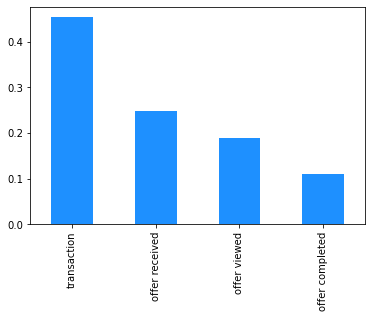

In [32]:
df_t['event'].value_counts(normalize=True).plot.bar(color='dodgerblue');

Let's check transactions only

In [33]:
df_t[df_t['event'] == 'transaction']['value'].unique().tolist()

["{'amount': 0.8300000000000001}",
 "{'amount': 34.56}",
 "{'amount': 13.23}",
 "{'amount': 19.51}",
 "{'amount': 18.97}",
 "{'amount': 33.9}",
 "{'amount': 0.22}",
 "{'amount': 18.59}",
 "{'amount': 18.01}",
 "{'amount': 19.11}",
 "{'amount': 36.19}",
 "{'amount': 6.46}",
 "{'amount': 5.02}",
 "{'amount': 28.39}",
 "{'amount': 28.08}",
 "{'amount': 0.75}",
 "{'amount': 1.02}",
 "{'amount': 13.57}",
 "{'amount': 10.22}",
 "{'amount': 31.42}",
 "{'amount': 27.89}",
 "{'amount': 4.2}",
 "{'amount': 13.05}",
 "{'amount': 1.16}",
 "{'amount': 38.38}",
 "{'amount': 4.08}",
 "{'amount': 5.78}",
 "{'amount': 14.27}",
 "{'amount': 11.52}",
 "{'amount': 13.93}",
 "{'amount': 4.05}",
 "{'amount': 30.03}",
 "{'amount': 21.84}",
 "{'amount': 10.37}",
 "{'amount': 1.21}",
 "{'amount': 5.46}",
 "{'amount': 7.4}",
 "{'amount': 2.95}",
 "{'amount': 19.82}",
 "{'amount': 11.83}",
 "{'amount': 5.31}",
 "{'amount': 2.44}",
 "{'amount': 3.26}",
 "{'amount': 24.8}",
 "{'amount': 1.23}",
 "{'amount': 17.0}"

Let's check offers only

In [34]:
df_t[df_t['event'] != 'transaction']['value'].unique().tolist()

["{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}",
 "{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}",
 "{'offer id': '2906b810c7d4411798c6938adc9daaa5'}",
 "{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}",
 "{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}",
 "{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}",
 "{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}",
 "{'offer id': '3f207df678b143eea3cee63160fa8bed'}",
 "{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}",
 "{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}",
 "{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",
 "{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",
 "{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",
 "{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd', 'reward': 10}",
 "{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0', 'reward': 10}",
 "{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}",
 "{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",
 "{'of

We can create features for each user to show thier behavior in making transactions and using the offers.

## Data cleaning

### Profile data

We decided to have the following data cleaning steps:
1. Deal with age over 100 y.o.
2. Deal with null values in `income` and `gender` columns
3. Change data type from int to datetime for `became_member_on` column

#### Deal with age over 100 y.o. & Null values

In [35]:
df_p = df_p[df_p['age'] <= 100]

In [36]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14820 non-null  object 
 1   age               14820 non-null  int64  
 2   id                14820 non-null  object 
 3   became_member_on  14820 non-null  int64  
 4   income            14820 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.7+ KB


In [37]:
df_p.isnull().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

If we remove age records for more than 100 y.o., there are no null records

In [38]:
df_p.describe()

age  became_member_on     income
count 14,820.00         14,820.00  14,820.00
mean      54.38     20,166,887.17  65,404.18
std       17.37         11,886.72  21,598.76
min       18.00     20,130,729.00  30,000.00
25%       42.00     20,160,520.00  49,000.00
50%       55.00     20,170,802.00  64,000.00
75%       66.00     20,171,230.00  80,000.00
max      100.00     20,180,726.00 120,000.00

#### Change data type from int to datetime for `became_member_on` column

In [39]:
df_p['became_member_on'] = pd.to_datetime(df_p['became_member_on'], format='%Y%m%d')

In [40]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14820 non-null  object        
 1   age               14820 non-null  int64         
 2   id                14820 non-null  object        
 3   became_member_on  14820 non-null  datetime64[ns]
 4   income            14820 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.7+ KB


In [41]:
df_p.sample(5)

gender  age                                id became_member_on    income
1306      M   48  8d1e56c804e140fca2c001caf65d3eaa       2017-12-06 39,000.00
9056      M   57  f8e69750104947f0a16bfed5dab877ce       2015-08-07 91,000.00
5415      F   34  3b28568258854d9a98781aa1486c414c       2017-11-02 58,000.00
575       M   61  ae37927ce8524f43b2174b77d89263a3       2017-04-25 39,000.00
1029      M   40  f6baa0a236294d1a802901b8f2dbdbf6       2016-11-05 44,000.00

## Feature engineering

### Profile data

**Ideas on feature engineering:**
1. `days_being_member` column can be created using `became_member_on` column
2. Change values for `gender`column. 
Instead of using F, M and O values, we can use numbers 1 - F, 2 - M, O - 3.

#### Create column `days_being_member` 

In [42]:
df_p['became_member_on'].min(), df_p['became_member_on'].max()

(Timestamp('2013-07-29 00:00:00'), Timestamp('2018-07-26 00:00:00'))

In [43]:
# Create a feature
# Let's calculate from the latest date available in the dataframe
df_p['days_being_member'] = (df_p['became_member_on'].max() - df_p['became_member_on']).dt.days

In [44]:
df_p['days_being_member'].describe(percentiles=[0.8])

count   14,820.00
mean       522.49
std        419.23
min          0.00
50%        358.00
80%        885.00
max      1,823.00
Name: days_being_member, dtype: float64

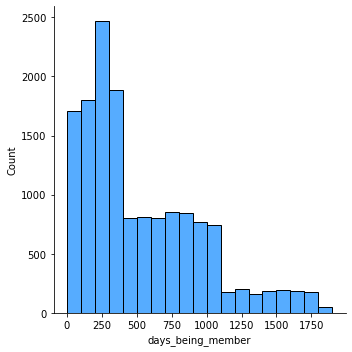

In [45]:
sns.displot(df_p, x="days_being_member", color='dodgerblue', binwidth=100);

The majority of users had an app for at least 885 days, which is less than 2.5 years.

#### Change values for `gender` column

In [46]:
df_p['gender'].value_counts()

M    8484
F    6124
O     212
Name: gender, dtype: int64

In [47]:
map_dict = {"F": 1,
            "M": 2,
            "O": 3}

In [48]:
df_p['gender'] = df_p['gender'].map(map_dict)

In [49]:
df_p['gender'].value_counts()

2    8484
1    6124
3     212
Name: gender, dtype: int64

Let's look at the cleaned and transfromed data

In [50]:
df_p.head()

gender  age                                id became_member_on     income  \
1        1   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15 112,000.00   
3        1   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09 100,000.00   
5        2   68  e2127556f4f64592b11af22de27a7932       2018-04-26  70,000.00   
8        2   65  389bc3fa690240e798340f5a15918d5c       2018-02-09  53,000.00   
12       2   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11  51,000.00   

    days_being_member  
1                 376  
3                 443  
5                  91  
8                 167  
12                257

In [51]:
df_p['id'].nunique()

14820

We removed records for about 13% of unique users

In [52]:
df_p['gender'].value_counts(normalize=True).plot.bar(color='dodgerblue');

Male users are dominant

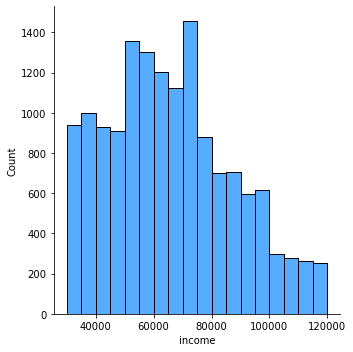

In [53]:
sns.displot(df_p, x="income", color='dodgerblue', binwidth=5000);

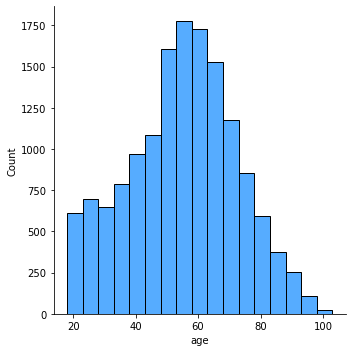

In [54]:
sns.displot(df_p, x="age", color='dodgerblue', binwidth=5);

In [55]:
# Let's change column name for 'id' to 'person' 
df_p.columns = ['gender', 'age', 'person', 'became_member_on', 'income', 'days_being_member']

In [56]:
df_p.head(2)

gender  age                            person became_member_on     income  \
1       1   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15 112,000.00   
3       1   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09 100,000.00   

   days_being_member  
1                376  
3                443

In [57]:
# Let's drop column 'became_member_on'
df_p.drop(columns=['became_member_on'], inplace=True)

In [58]:
# Let's save cleaned data
df_p.to_csv("./data/starbucks/profile_clean.csv", index=False)

### Transcript data

In [59]:
df_t.head(2)

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0

Let's separate data into offers and transactions

In [60]:
df_tr = df_t[df_t['event'] == 'transaction']
df_off = df_t[df_t['event'] != 'transaction']

#### Engineering transaction features

In [61]:
df_tr.head(2)

person        event  \
12654  02c083884c7d45b39cc68e1314fec56c  transaction   
12657  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction   

                                value  time  
12654  {'amount': 0.8300000000000001}     0  
12657               {'amount': 34.56}     0

In [62]:
print("Percentage of transaction data out of all records: ", (df_tr.shape[0] / df_t.shape[0]) * 100)

Percentage of transaction data out of all records:  45.33037118231583


In [63]:
df_tr['person'].nunique()

16578

In [64]:
# Create transaction amount column
df_tr['transactions_amount'] = df_tr['value'].str[11:16]
df_tr['transactions_amount'] = df_tr['transactions_amount'].str.replace('}', '')
df_tr['transactions_amount'] = df_tr['transactions_amount'].astype(float)

In [65]:
df_tr.head()

person        event  \
12654  02c083884c7d45b39cc68e1314fec56c  transaction   
12657  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction   
12659  54890f68699049c2a04d415abc25e717  transaction   
12670  b2f1cd155b864803ad8334cdf13c4bd2  transaction   
12671  fe97aa22dd3e48c8b143116a8403dd52  transaction   

                                value  time  transactions_amount  
12654  {'amount': 0.8300000000000001}     0                 0.83  
12657               {'amount': 34.56}     0                34.56  
12659               {'amount': 13.23}     0                13.23  
12670               {'amount': 19.51}     0                19.51  
12671               {'amount': 18.97}     0                18.97

In [66]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   person               138953 non-null  object 
 1   event                138953 non-null  object 
 2   value                138953 non-null  object 
 3   time                 138953 non-null  int64  
 4   transactions_amount  138953 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [67]:
# Create a column with transactions
df_tr['transactions'] = 1

In [68]:
df_tr.head()

person        event  \
12654  02c083884c7d45b39cc68e1314fec56c  transaction   
12657  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction   
12659  54890f68699049c2a04d415abc25e717  transaction   
12670  b2f1cd155b864803ad8334cdf13c4bd2  transaction   
12671  fe97aa22dd3e48c8b143116a8403dd52  transaction   

                                value  time  transactions_amount  transactions  
12654  {'amount': 0.8300000000000001}     0                 0.83             1  
12657               {'amount': 34.56}     0                34.56             1  
12659               {'amount': 13.23}     0                13.23             1  
12670               {'amount': 19.51}     0                19.51             1  
12671               {'amount': 18.97}     0                18.97             1

Let's aggregate the transaction data per user using sum aggregation

In [69]:
df_tr_agg = df_tr.groupby('person').agg({'transactions_amount':'sum',
                                         'transactions':'sum'}).reset_index()

In [70]:
df_tr_agg.head()

person  transactions_amount  transactions
0  0009655768c64bdeb2e877511632db8f               127.60             8
1  00116118485d4dfda04fdbaba9a87b5c                 4.09             3
2  0011e0d4e6b944f998e987f904e8c1e5                79.46             5
3  0020c2b971eb4e9188eac86d93036a77               196.86             8
4  0020ccbbb6d84e358d3414a3ff76cffd               154.05            12

In [71]:
df_tr_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16578 entries, 0 to 16577
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   person               16578 non-null  object 
 1   transactions_amount  16578 non-null  float64
 2   transactions         16578 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 388.7+ KB


In [72]:
df_tr_agg.describe(percentiles=[0.8])

transactions_amount  transactions
count            16,578.00     16,578.00
mean                107.10          8.38
std                 126.39          5.01
min                   0.05          1.00
50%                  72.41          7.00
80%                 170.65         12.00
max               1,608.60         36.00

#### Engineering offers related features

In [73]:
df_off.head(3)

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0

In [74]:
df_off['person'].nunique()

16994

In [75]:
# Create a column with offer ids
df_off['offer_id'] = df_off['value'].str[14:46]

In [76]:
df_off.head(3)

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   

                           offer_id  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7  
2  2906b810c7d4411798c6938adc9daaa5

In [77]:
# Let's add offer type
df_off = pd.merge(df_off, df_port[['offer_type', 'offer_id']],
                  left_on=['offer_id'],
                  right_on=['offer_id'],
                  how='left')

In [78]:
df_off.head(3)

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   

                           offer_id offer_type  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9       bogo  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7   discount  
2  2906b810c7d4411798c6938adc9daaa5   discount

***Apply one-hot encoding***

In [79]:
df_off_one_hot_enc = pd.get_dummies(df_off, columns = ['event', 'offer_type'])

In [80]:
df_off_one_hot_enc.head(2)

person  \
0  78afa995795e4d85b5d9ceeca43f5fef   
1  a03223e636434f42ac4c3df47e8bac43   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   

                           offer_id  event_offer completed  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9                      0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7                      0   

   event_offer received  event_offer viewed  offer_type_bogo  \
0                     1                   0                1   
1                     1                   0                0   

   offer_type_discount  offer_type_informational  
0                    0                         0  
1                    1                         0

In [81]:
df_off_one_hot_enc.columns = ['person', 'value', 'time', 'offer_id', 'offers_completed',
                              'offers_received', 'offers_viewed', 'offer_type_bogo_cnt',
                              'offer_type_discount_cnt', 'offer_type_informational_cnt']

In [82]:
df_off_agg = df_off_one_hot_enc.groupby('person').agg({'offers_completed':'sum',
                                                       'offers_received':'sum',
                                                       'offers_viewed':'sum',
                                                       'offer_type_bogo_cnt':'sum',
                                                       'offer_type_discount_cnt':'sum',
                                                       'offer_type_informational_cnt':'sum'}).reset_index()

In [83]:
df_off_agg.head()

person  offers_completed  offers_received  \
0  0009655768c64bdeb2e877511632db8f                 3                5   
1  00116118485d4dfda04fdbaba9a87b5c                 0                2   
2  0011e0d4e6b944f998e987f904e8c1e5                 3                5   
3  0020c2b971eb4e9188eac86d93036a77                 3                5   
4  0020ccbbb6d84e358d3414a3ff76cffd                 3                4   

   offers_viewed  offer_type_bogo_cnt  offer_type_discount_cnt  \
0              4                    3                        5   
1              2                    4                        0   
2              5                    3                        6   
3              3                    4                        5   
4              4                    6                        3   

   offer_type_informational_cnt  
0                             4  
1                             0  
2                             4  
3                             2  
4                             2

In [84]:
df_off_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16994 entries, 0 to 16993
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   person                        16994 non-null  object
 1   offers_completed              16994 non-null  uint8 
 2   offers_received               16994 non-null  uint8 
 3   offers_viewed                 16994 non-null  uint8 
 4   offer_type_bogo_cnt           16994 non-null  uint8 
 5   offer_type_discount_cnt       16994 non-null  uint8 
 6   offer_type_informational_cnt  16994 non-null  uint8 
dtypes: object(1), uint8(6)
memory usage: 232.5+ KB


#### Merge transactions and offfer data

In [85]:
df_off_agg['person'].nunique()

16994

In [86]:
df_tr_agg['person'].nunique()

16578

In [87]:
df_tr_off = pd.merge(df_tr_agg, df_off_agg,
                     left_on=['person'], right_on=['person'],
                     how='outer')

In [88]:
df_tr_off.head()

person  transactions_amount  transactions  \
0  0009655768c64bdeb2e877511632db8f               127.60          8.00   
1  00116118485d4dfda04fdbaba9a87b5c                 4.09          3.00   
2  0011e0d4e6b944f998e987f904e8c1e5                79.46          5.00   
3  0020c2b971eb4e9188eac86d93036a77               196.86          8.00   
4  0020ccbbb6d84e358d3414a3ff76cffd               154.05         12.00   

   offers_completed  offers_received  offers_viewed  offer_type_bogo_cnt  \
0              3.00             5.00           4.00                 3.00   
1              0.00             2.00           2.00                 4.00   
2              3.00             5.00           5.00                 3.00   
3              3.00             5.00           3.00                 4.00   
4              3.00             4.00           4.00                 6.00   

   offer_type_discount_cnt  offer_type_informational_cnt  
0                     5.00                          4.00  
1                     0.00                          0.00  
2                     6.00                          4.00  
3                     5.00                          2.00  
4                     3.00                          2.00

In [89]:
df_tr_off['person'].nunique()

17000

In [90]:
df_tr_off.isnull().sum()

person                            0
transactions_amount             422
transactions                    422
offers_completed                  6
offers_received                   6
offers_viewed                     6
offer_type_bogo_cnt               6
offer_type_discount_cnt           6
offer_type_informational_cnt      6
dtype: int64

In [91]:
df_tr_off.fillna(-1, inplace=True)

In [92]:
df_tr_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   person                        17000 non-null  object 
 1   transactions_amount           17000 non-null  float64
 2   transactions                  17000 non-null  float64
 3   offers_completed              17000 non-null  float64
 4   offers_received               17000 non-null  float64
 5   offers_viewed                 17000 non-null  float64
 6   offer_type_bogo_cnt           17000 non-null  float64
 7   offer_type_discount_cnt       17000 non-null  float64
 8   offer_type_informational_cnt  17000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Merge profile and transcript data

In [93]:
df_p.head()

gender  age                            person     income  \
1        1   55  0610b486422d4921ae7d2bf64640c50b 112,000.00   
3        1   75  78afa995795e4d85b5d9ceeca43f5fef 100,000.00   
5        2   68  e2127556f4f64592b11af22de27a7932  70,000.00   
8        2   65  389bc3fa690240e798340f5a15918d5c  53,000.00   
12       2   58  2eeac8d8feae4a8cad5a6af0499a211d  51,000.00   

    days_being_member  
1                 376  
3                 443  
5                  91  
8                 167  
12                257

In [94]:
df_p['person'].nunique()

14820

In [95]:
df_p.shape

(14820, 5)

In [96]:
df = pd.merge(df_p, df_tr_off, left_on='person', right_on='person', how='left')

In [97]:
df.head()

gender  age                            person     income  \
0       1   55  0610b486422d4921ae7d2bf64640c50b 112,000.00   
1       1   75  78afa995795e4d85b5d9ceeca43f5fef 100,000.00   
2       2   68  e2127556f4f64592b11af22de27a7932  70,000.00   
3       2   65  389bc3fa690240e798340f5a15918d5c  53,000.00   
4       2   58  2eeac8d8feae4a8cad5a6af0499a211d  51,000.00   

   days_being_member  transactions_amount  transactions  offers_completed  \
0                376                77.01          3.00              1.00   
1                443               159.27          7.00              3.00   
2                 91                57.73          3.00              2.00   
3                167                36.43          3.00              5.00   
4                257                15.62          4.00              1.00   

   offers_received  offers_viewed  offer_type_bogo_cnt  \
0             2.00           0.00                 2.00   
1             4.00           4.00                 9.00   
2             4.00           3.00                 3.00   
3             6.00           6.00                11.00   
4             3.00           2.00                 0.00   

   offer_type_discount_cnt  offer_type_informational_cnt  
0                     0.00                          1.00  
1                     0.00                          2.00  
2                     5.00                          1.00  
3                     6.00                          0.00  
4                     5.00                          1.00

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 0 to 14819
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        14820 non-null  int64  
 1   age                           14820 non-null  int64  
 2   person                        14820 non-null  object 
 3   income                        14820 non-null  float64
 4   days_being_member             14820 non-null  int64  
 5   transactions_amount           14820 non-null  float64
 6   transactions                  14820 non-null  float64
 7   offers_completed              14820 non-null  float64
 8   offers_received               14820 non-null  float64
 9   offers_viewed                 14820 non-null  float64
 10  offer_type_bogo_cnt           14820 non-null  float64
 11  offer_type_discount_cnt       14820 non-null  float64
 12  offer_type_informational_cnt  14820 non-null  float64
dtypes

In [100]:
# Let's save the dataset we will work with in the next sections
df.to_csv("./data/starbucks/combined.csv", index=False)

## Analysis

### Create user clusters